# 📘 PEW Research Dataset — Full Data Cleaning, Exploration & Visualization Notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pew-raw.csv")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


## 🔍 2. Initial Exploration

In [3]:
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [4]:
df.tail()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [5]:
df.loc[0:3]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116


In [6]:
df.iloc[0:3, 0:4]

,religion,<$10k,$10-20k,$20-30k
0,Agnostic,27,34,60
1,Atheist,12,27,37
2,Buddhist,27,21,30


## ⚠️ 3. Identify Issues
- Income bracket columns contain values, not variable names.
- Some column names contain leading/trailing spaces.
- Religion names also contain trailing spaces.
- Dataset is in wide format, not tidy.

## 🧼 4. Clean Column Names

In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "")
df['religion'] = df['religion'].str.strip()
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


## 🔄 5. Reshape to Long Format Using `melt`

In [8]:
df_long = df.melt(
    id_vars="religion",
    var_name="income_bracket",
    value_name="count"
)
df_long

,religion,income_bracket,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


## 📊 6. Summary Statistics

In [9]:
df_long['count'].describe()

count      60.000000
mean      213.250000
std       344.877902
min         1.000000
25%        21.000000
50%        34.000000
75%       230.000000
max      1486.000000
Name: count, dtype: float64

In [10]:
df_long.groupby('religion')['count'].sum().sort_values(ascending=False)

religion
Evangelical Prot           5857
Catholic                   4191
Historically Black Prot    1366
Agnostic                    415
Atheist                     233
Jewish                      213
Buddhist                    203
Jehovahs Witness            146
Dont know/refused           100
Hindu                        71
Name: count, dtype: int64

In [11]:
df_long.groupby('income_bracket')['count'].sum().sort_values(ascending=False)

income_bracket
$50-75k    3284
$20-30k    2230
$30-40k    2126
$40-50k    1932
$10-20k    1881
<$10k      1342
Name: count, dtype: int64

## 🎨 7. Visualizations

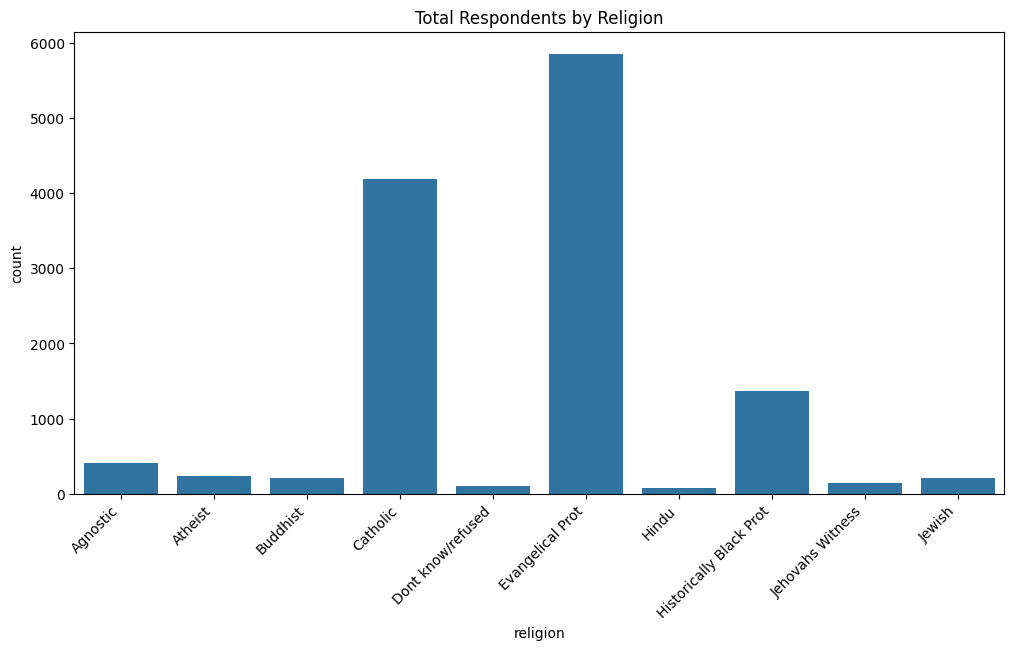

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_long.groupby('religion')['count'].sum().reset_index(),
    x='religion', y='count'
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Respondents by Religion")
plt.show()

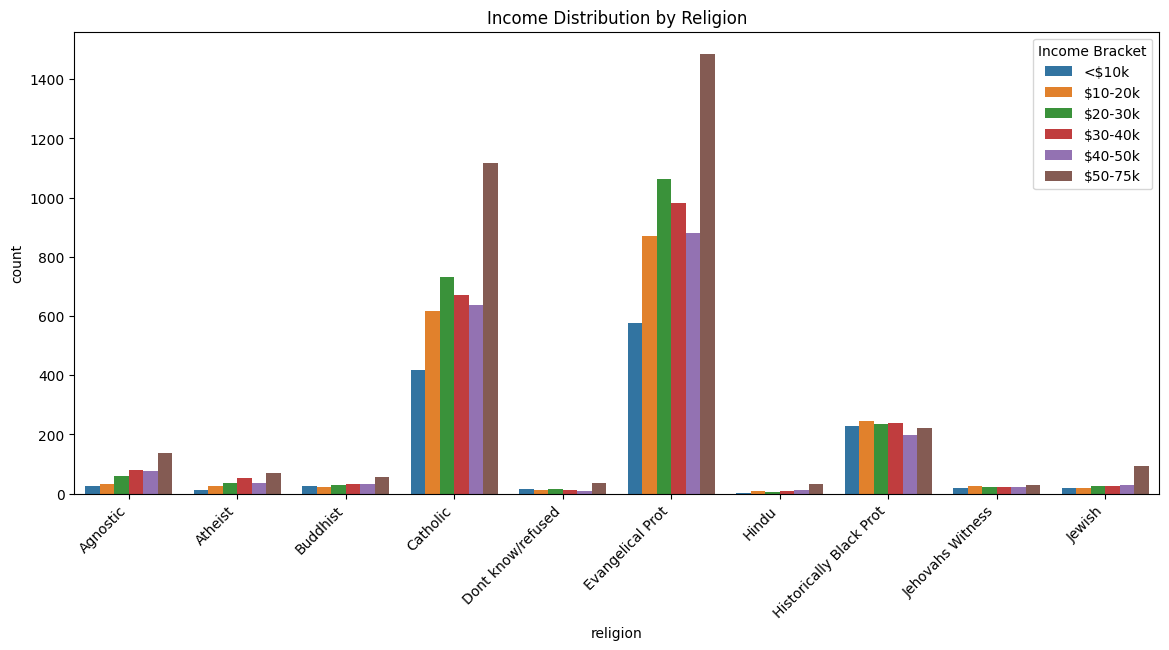

In [13]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_long,
    x='religion', y='count', hue='income_bracket'
)
plt.xticks(rotation=45, ha='right')
plt.title("Income Distribution by Religion")
plt.legend(title="Income Bracket")
plt.show()

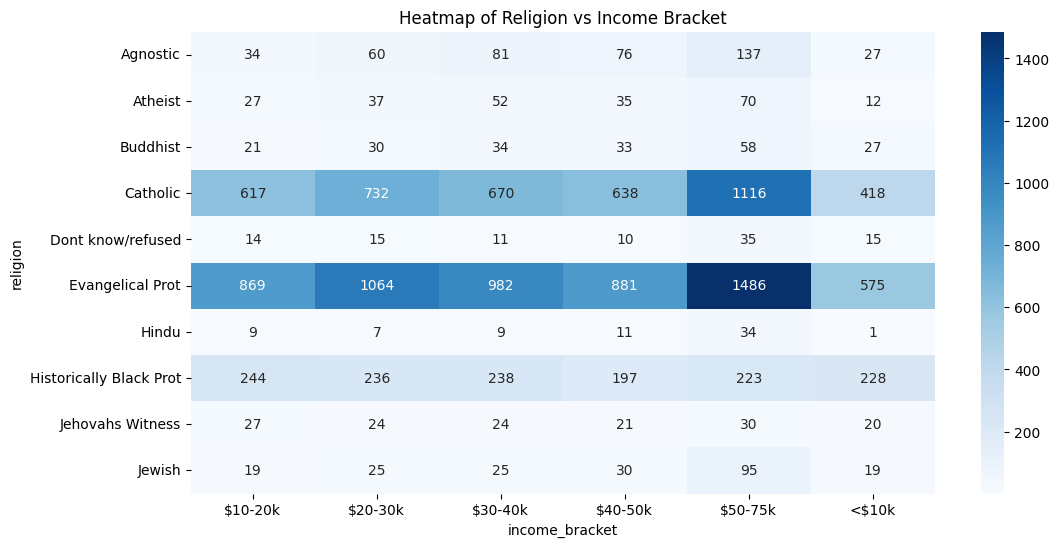

In [14]:
pivot = df_long.pivot(index='religion', columns='income_bracket', values='count')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Religion vs Income Bracket")
plt.show()

## 📁 8. Export the Tidy Dataset

In [15]:
df_long.to_csv("pew-tidy.csv", index=False)